___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Freddy Dratwa

#### Victor Vazquez

#### Michel Haggiag

#### Allan Singer

#### Ricardo Ferraro

___

# Estudo do preço do carro

___

## A. INTRODUÇÃO

## https://www.kaggle.com/jpayne/852k-used-car-listings
## https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

O objetivo deste projeto é chegar ao melhor modelo possível que seja capaz de prever o preço de um carro usado nos EUA a partir das características presentes no dataset:
    - Preço; 
    - Ano; 
    - Quilometragem;
    - Cidade;
    - Estado;
    - Marca;
    - Modelo;
    - Númer de Chassis.
    
A base de dados possui 1.2 milhão de carros com data de produção entre os anos 1997 a 2018 de 58 marcas diferentes, sendo estes 2914 modelos distintos com o preço mÍnimo de U$ 1500,00 e máximo de U$ 462 000,00, com a mínima quilometragem 8 Km e a máxima 2286260.8 Km.

Como uma primeira previsão, imagina-se que algumas das características do dataset influenciam mais no preço do carro do que outras. Por exemplo, é de se esperar que um carro comprado há mais tempo tenha seu preço menor atualmente. Ou seja, a variavel "Ano", que representa o ano em que o carro foi fabricado, deve influenciar muito no preço do veículo, bem como a quilometragem, onde um carro que foi comprado mas usado pouco deve permanecer mais barato do que um usado muitas vezes.

Pelo outro lado, imagina-se que a variável "Cidade", a qual representa a cidade onde o carro foi comprado, não tenha tanta influência no preço do veículo, a não ser que comparadas  duas cidades com condições muito diferentes. Por exemplo, como se tratam de cidades apenas nos EUA, imaina-se que em cidades no litoral, os carros se depreciem com velocidade maior, como consequência do fenômeno da Maresia.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### BASE DE DADOS

**Limpando e tratando dataset**

In [3]:
dataset = pd.read_csv("Dataframe.csv")

In [72]:
if "Unnamed: 10" in dataset and "Unnamed: 9" in dataset and "Vin" in dataset:
    dataset = dataset.drop(columns=["Vin","Unnamed: 9", "Unnamed: 10", "Unnamed: 0"])
    dataset["Mileage"] = dataset["Mileage"].apply(lambda x: x*1.6)
    dataset.columns = ["ID","PRECO","ANO","KM","CIDADE","ESTADO","MARCA","MODELO"]

dataset["IDADE"] = dataset["ANO"].apply(lambda x: 2019-x)
dataset["ESTADO"] = dataset["ESTADO"].apply(lambda x: x.upper())
dataset["CIDADE"] = dataset["CIDADE"].apply(lambda x: x.upper())
dataset["MARCA"] = dataset["MARCA"].apply(lambda x: x.upper())
dataset["MODELO"] = dataset["MODELO"].apply(lambda x: x.upper())
dataset= dataset[["ID","PRECO","ANO","IDADE","KM","CIDADE","ESTADO","MARCA","MODELO"]]

dataset.head()

,ID,PRECO,ANO,IDADE,KM,CIDADE,ESTADO,MARCA,MODELO
0,71314.0,30865.0,2015.0,4.0,31798.4,SALINAS,CA,DODGE,DURANGOAWD
1,550011.0,16492.0,2015.0,4.0,48518.4,CLIVE,IA,CHRYSLER,200C
2,333281.0,20994.0,2014.0,5.0,31390.4,SINKING SPRING,PA,TOYOTA,RAV44X4
3,140986.0,29588.0,2014.0,5.0,36539.2,SARASOTA,FL,CADILLAC,SRXLUXURY
4,415607.0,14980.0,2010.0,9.0,37772.8,SPRINGFIELD,PA,BUICK,LACROSSE4DR


## ANÁLISE DESCRITIVA

**Características da variável Preço**

In [9]:
dataset["PRECO"].describe()

count    100000.000000
mean      21112.148860
std       12937.887537
min        1500.000000
25%       12993.000000
50%       17999.000000
75%       26839.250000
max      368889.000000
Name: PRECO, dtype: float64

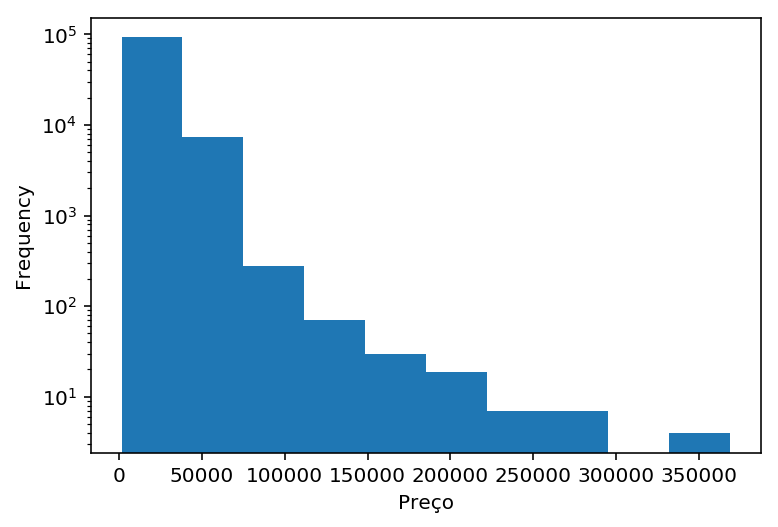

In [11]:
dataset["PRECO"].plot.hist(logy=True);
plt.xlabel("Preço");

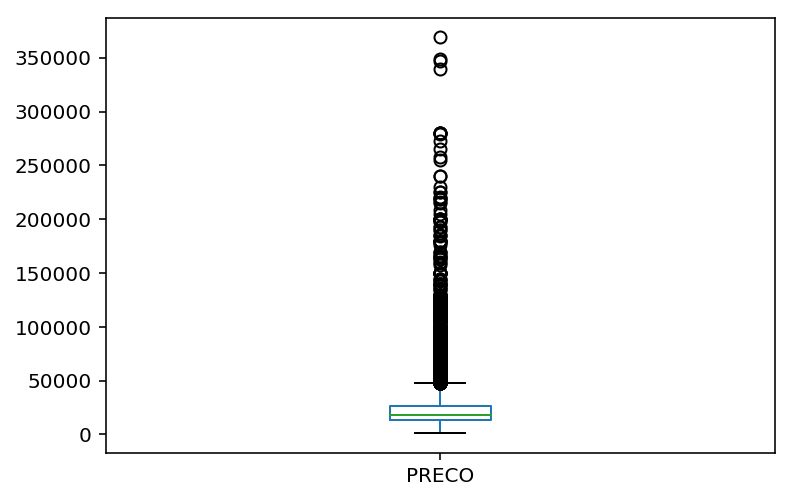

In [14]:
dataset["PRECO"].plot.box()
plt.show()

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Características da variável Ano**

In [18]:
dataset["ANO"].describe()

count    100000.000000
mean       2013.312170
std           3.429186
min        1997.000000
25%        2012.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: ANO, dtype: float64

In [19]:
dataset["ANO"].value_counts().head(5)

2014.0    18322
2015.0    18315
2016.0    15541
2017.0    11579
2013.0     8678
Name: ANO, dtype: int64

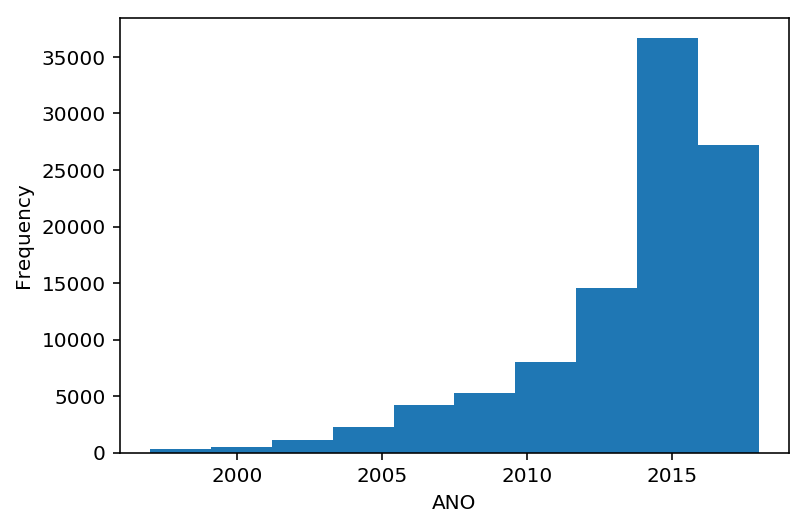

In [20]:
dataset["ANO"].plot.hist();
plt.xlabel("ANO");

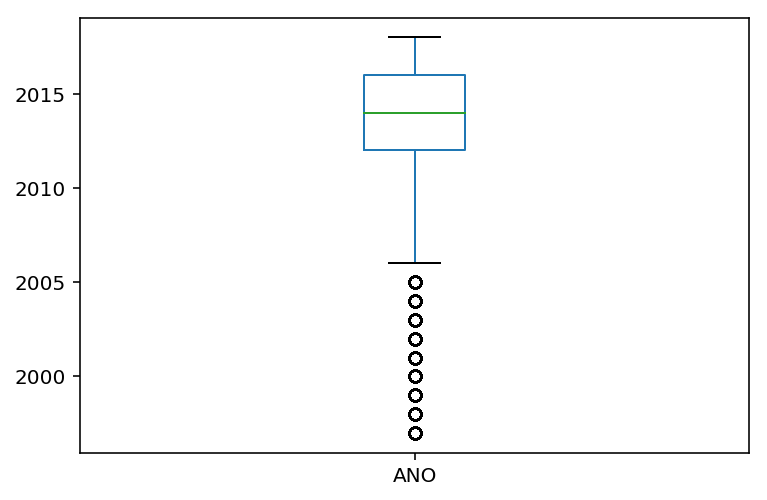

In [22]:
dataset["ANO"].plot.box()
plt.show()

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Características da variável Km**

In [25]:
dataset["KM"].describe()

count    1.000000e+05
mean     8.436968e+04
std      6.586877e+04
min      8.000000e+00
25%      3.866680e+04
50%      6.483920e+04
75%      1.160308e+05
max      2.010592e+06
Name: KM, dtype: float64

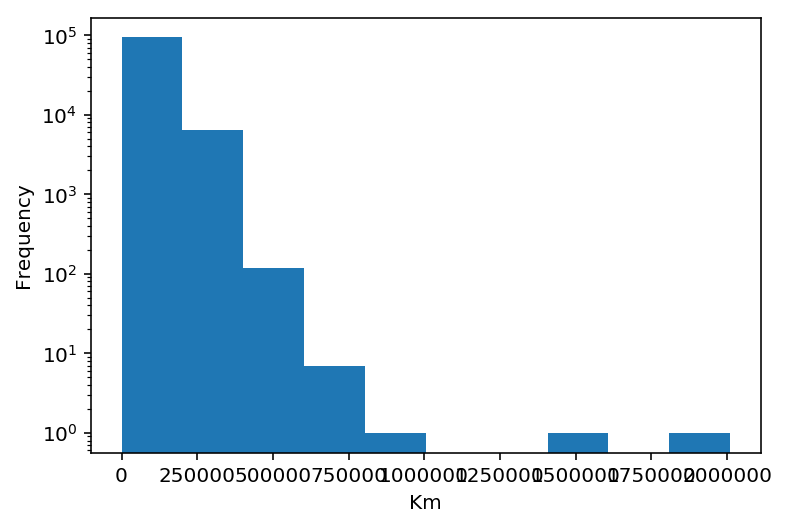

In [27]:
dataset["KM"].plot.hist(logy=True);
plt.xlabel("Km");

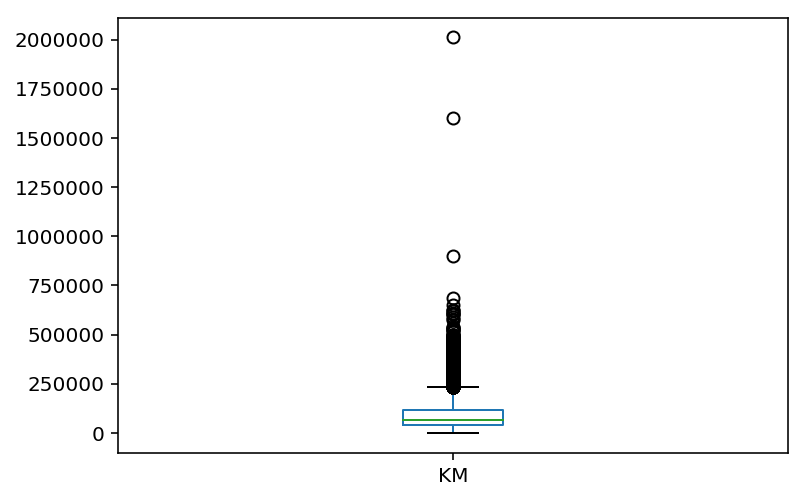

In [28]:
dataset["KM"].plot.box()
plt.show()

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Características da variável Idade**

In [74]:
dataset["IDADE"].describe()

count    100000.000000
mean          5.687830
std           3.429186
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          22.000000
Name: IDADE, dtype: float64

In [78]:
dataset["IDADE"].value_counts().head(5)

5.0    18322
4.0    18315
3.0    15541
2.0    11579
6.0     8678
Name: IDADE, dtype: int64

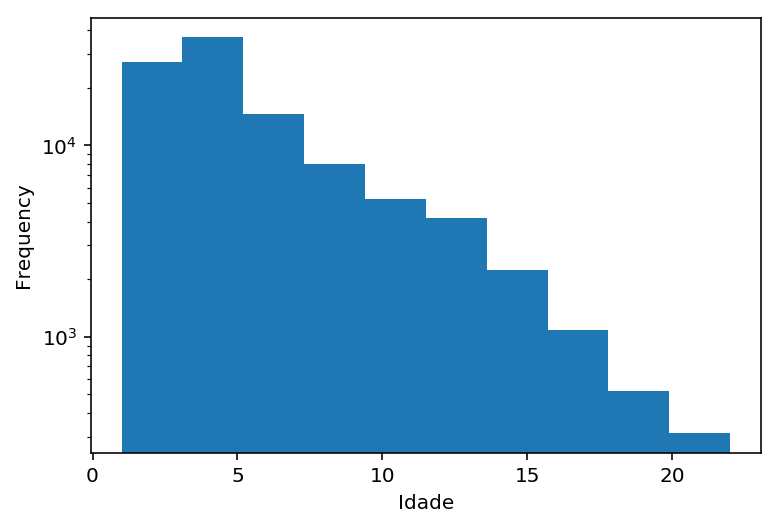

In [81]:
dataset["IDADE"].plot.hist(logy=True);
plt.xlabel("Idade");

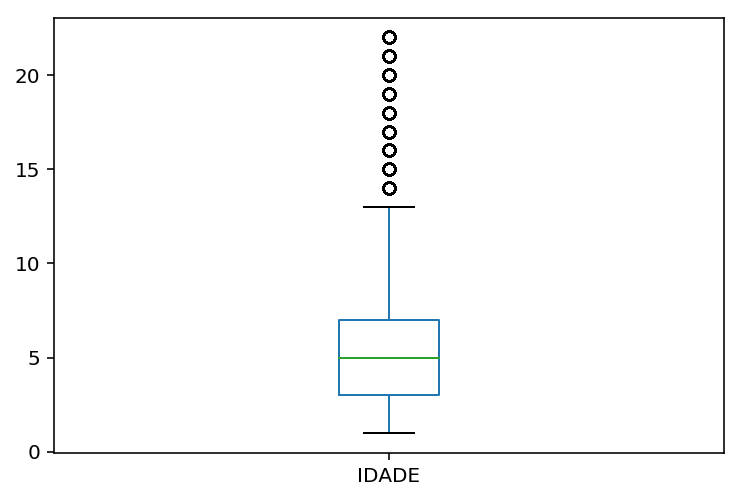

In [82]:
dataset["IDADE"].plot.box()
plt.show()

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Característica da varíavel Cidade**


In [31]:
dataset["CIDADE"].describe()

count      100000
unique       2416
top       HOUSTON
freq         1708
Name: CIDADE, dtype: object

In [32]:
dataset["CIDADE"].value_counts().head(10)

HOUSTON             1708
SAN ANTONIO          882
LOUISVILLE           787
ORLANDO              690
JACKSONVILLE         686
AUSTIN               661
MIAMI                656
COLORADO SPRINGS     596
PHILADELPHIA         587
RALEIGH              586
Name: CIDADE, dtype: int64

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Característica da variável Estado**

In [34]:
dataset["ESTADO"].describe()

count     100000
unique        51
top           TX
freq       11552
Name: ESTADO, dtype: object

In [35]:
dataset["ESTADO"].value_counts().head(10)

 TX    11552
 FL     9099
 CA     9097
 GA     4739
 IL     4547
 NC     4359
 VA     3982
 PA     3248
 NJ     3080
 NY     3066
Name: ESTADO, dtype: int64

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Característica da variável Marca**

In [39]:
dataset["MARCA"].describe()

count     100000
unique        57
top         FORD
freq       15626
Name: MARCA, dtype: object

In [40]:
dataset["MARCA"].value_counts().head(10)

FORD             15626
CHEVROLET        14339
HONDA             7259
NISSAN            6672
JEEP              5770
HYUNDAI           5090
DODGE             4825
GMC               4061
KIA               4056
MERCEDES-BENZ     3666
Name: MARCA, dtype: int64

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

**Característica da variável Modelo**

In [44]:
dataset["MODELO"].describe()

count        100000
unique         2123
top       SILVERADO
freq           3428
Name: MODELO, dtype: object

In [45]:
dataset["MODELO"].value_counts().head(10)

SILVERADO    3428
GRAND        2319
SIERRA       1573
ALTIMA2.5    1502
ACCORD       1389
F-1504WD     1314
WRANGLER     1213
CIVIC        1120
3            1097
FUSIONSE      969
Name: MODELO, dtype: int64

Análise:

    KJSDKFKJFKWEHFUKHCKEWMAGFBIUCWEJHAFBDUKJS 

### ANÁLISE DESCRITIVA

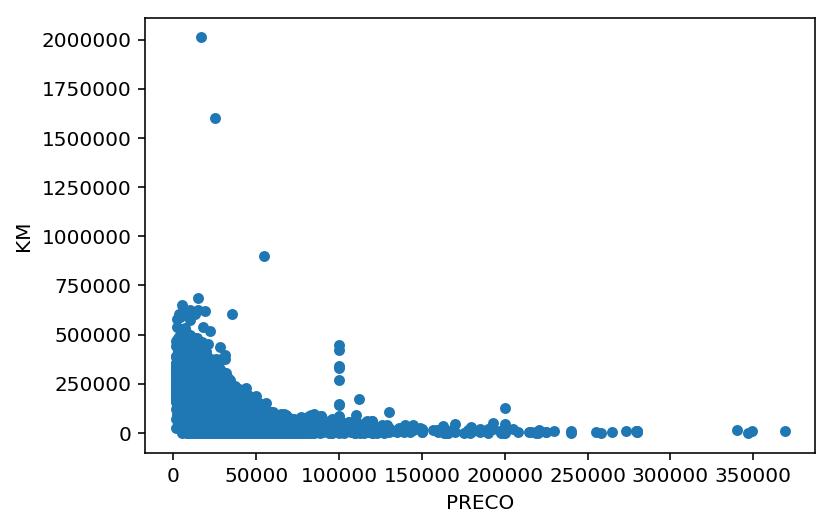

In [6]:
dataset.plot.scatter(y="KM", x = "PRECO");

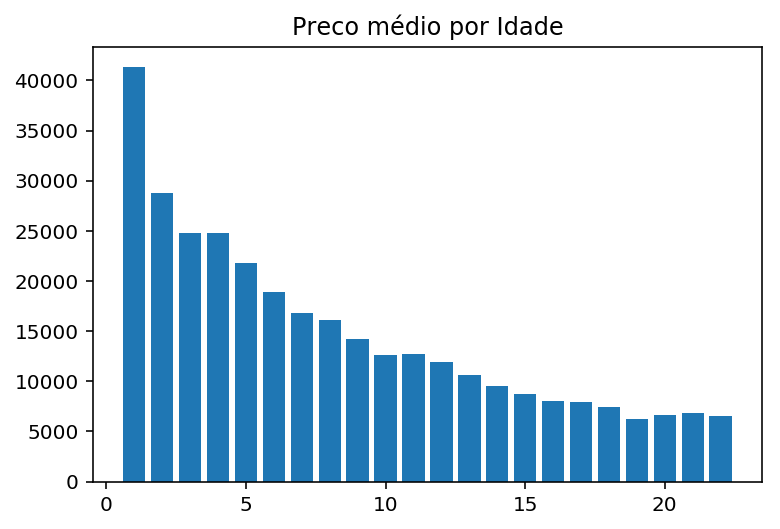

In [79]:
price_mean_by_year = []
for i in range(22):
    price_mean_by_year.append(dataset[dataset.IDADE == 1+i].PRECO.mean())
plt.bar(np.arange(1,23,1),price_mean_by_year)
plt.title("Preco médio por Idade")
plt.show()

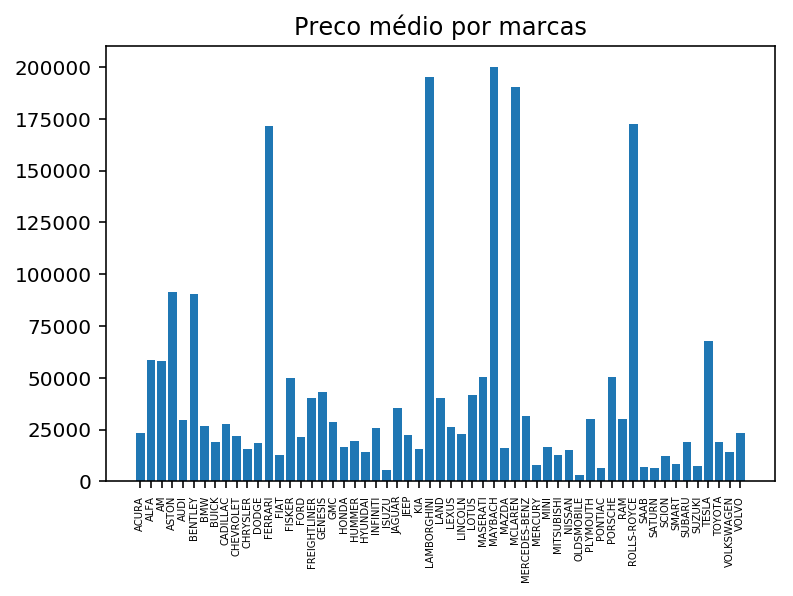

In [65]:
marcas = dataset["MARCA"].unique()

price_mean_by_marca = []
for i in marcas:
    price_mean_by_marca.append(dataset[dataset.MARCA == i].PRECO.mean())

plt.bar(marcas, price_mean_by_marca)
plt.xticks(rotation=90, fontsize=5)
plt.title("Preco médio por marcas")
plt.show()


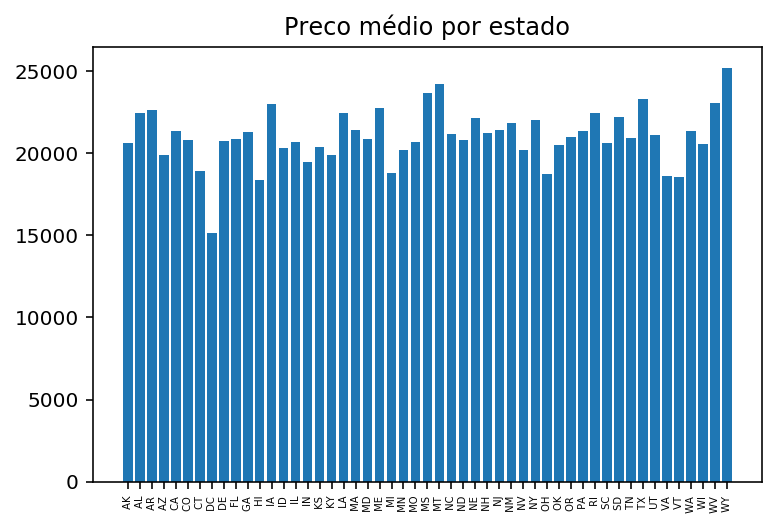

In [80]:
estados = dataset["ESTADO"].unique()

price_mean_by_estado = []
for i in estados:
    price_mean_by_estado.append(dataset[dataset.ESTADO == i].PRECO.mean())

plt.bar(estados, price_mean_by_estado)
plt.xticks(rotation=90, fontsize=5)
plt.title("Preco médio por estado")
plt.show()

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS